In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import max_norm

In [ ]:
data=pd.read_csv("hf://datasets/scikit-learn/churn-prediction/dataset.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.SeniorCitizen.replace([0,1],["No","Yes"],inplace=True)
data.TotalCharges.replace([" "],["0"],inplace=True)
data.TotalCharges=data.TotalCharges.astype(float)
data.drop("customerID",axis=1,inplace=True)
data.Churn.replace(["Yes","No"],[1,0],inplace=True)

/tmp/ipython-input-4141707385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.SeniorCitizen.replace([0,1],["No","Yes"],inplace=True)
/tmp/ipython-input-4141707385.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
data=pd.get_dummies(data)

In [ ]:
X=data.drop("Churn",axis=1)
y=data.Churn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
model=Sequential()
model.add(Dense(16,input_dim=46,activation='relu',kernel_constraint=max_norm(3)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dropout(rate=0.2))
model.add(Dense(8,activation='relu',kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
m=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=10)

Epoch 1/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7704 - loss: 0.4927 - val_accuracy: 0.7800 - val_loss: 0.4686
Epoch 2/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.4927 - val_accuracy: 0.7892 - val_loss: 0.4718
Epoch 3/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7636 - loss: 0.5009 - val_accuracy: 0.7928 - val_loss: 0.4746
Epoch 4/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.5084 - val_accuracy: 0.7921 - val_loss: 0.4593
Epoch 5/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7822 - loss: 0.4864 - val_accuracy: 0.7871 - val_loss: 0.4826
Epoch 6/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7751 - loss: 0.4881 - val_accuracy: 0.7956 - val_loss: 0.4614
Epoch 7/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7700 - loss: 0.4924 - val_accuracy: 0.7956 - val_loss: 0.4821
Epoch 8/40
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.4865 - val_accuracy: 0.

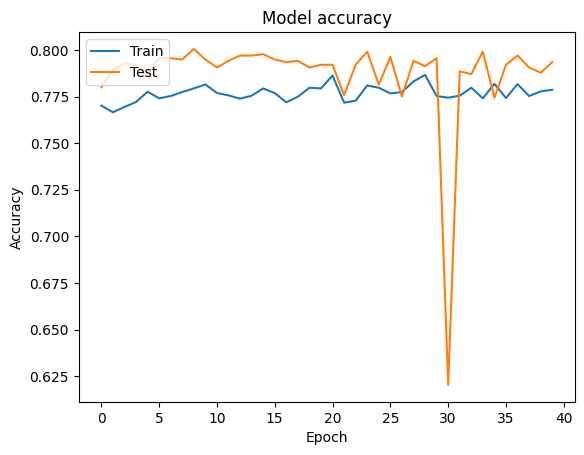

In [ ]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()